Exploratory Data Analysis On Dataset

Importing Modules

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import clear_output
import folium
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings("ignore")

In [6]:
sns.color_palette("dark")

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

Loading Dataset

In [7]:
data =  pd.read_csv('terrorism.csv', encoding='latin1')
data.shape

(181691, 135)

Analysis of dataset

In [8]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [9]:
data.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'extended':'Extended', 
                     'resolution':'Resolution', 'attacktype1_txt':'Attacktype', 'country_txt':'Country', 
                     'region_txt':'Region', 'provstate':'Provstate', 'city':'City', 'crit1':'Crit1', 
                     'crit2':'Crit2', 'crit3':'Crit3', 'multiple':'Multiple', 'success':'Success', 
                     'suicide':'Suicide', 'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 
                     'natlty2_txt':'Natlty2',  'natlty3_txt':'Natlty3', 'gname':'Gname', 
                     'gname2':'Gname2', 'gname3':'Gname3', 'guncertain1':'Guncertain1', 
                     'guncertain2':'Guncertain2', 'guncertain3':'Guncertain3', 'claimed':'Claimed', 
                     'weaptype1_txt':'Weaptype', 'weapsubtype1_txt':'Weapsubtype', 'nkill':'Kill', 
                     'nkillus':'Nkillus', 'nkillter':'Nkillter', 'nwound':'Wound', 'nwoundus':'Nwoundus', 
                     'nwoundte':'Nwoundter', 'property':'Property', 'propextent_txt':'Propextent', 
                     'propvalue':'Propvalue', 'ishostkid':'Ishostkid',  'nhostkid':'Nhostkid', 
                     'nhostkidus':'Nhostkidus', 'ransom':'Ransom', 'hostkidoutcome':'Hostkidoutcome', 
                     'nreleased':'Nreleased'},inplace=True)

                     

In [10]:
data = data[['Eventid','Year','Month','Day','Country','Provstate','Region','Provstate','City','latitude','Kill',
             'longitude','Crit1','Crit2','Crit3','Success','Suicide','Attacktype','Targtype','Natlty1','Gname', 
             'Guncertain1','Claimed', 'Weaptype','summary','motive','Wound','Extended','Ishostkid',
             'Hostkidoutcome']]

In [11]:
data.shape

(181691, 30)

In [12]:
data.describe()

,Eventid,Year,Month,Day,latitude,Kill,longitude,Crit1,Crit2,Crit3,Success,Suicide,Guncertain1,Claimed,Wound,Extended,Ishostkid,Hostkidoutcome
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,171378.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181311.000000,115571.000000,165380.000000,181691.000000,181513.000000,10991.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,2.403272,-4.586957e+02,0.988530,0.993093,0.875668,0.889598,0.036507,0.081440,0.049666,3.167668,0.045346,0.059054,4.629242
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,11.545741,2.047790e+05,0.106483,0.082823,0.329961,0.313391,0.187549,0.273511,1.093195,35.949392,0.208063,0.461244,2.035360
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,0.000000,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,-9.000000,1.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,0.000000,4.545640e+00,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,0.000000,4.324651e+01,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,2.000000,6.871033e+01,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,7.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1570.000000,1.793667e+02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8191.000000,1.000000,1.000000,7.000000


<AxesSubplot: >

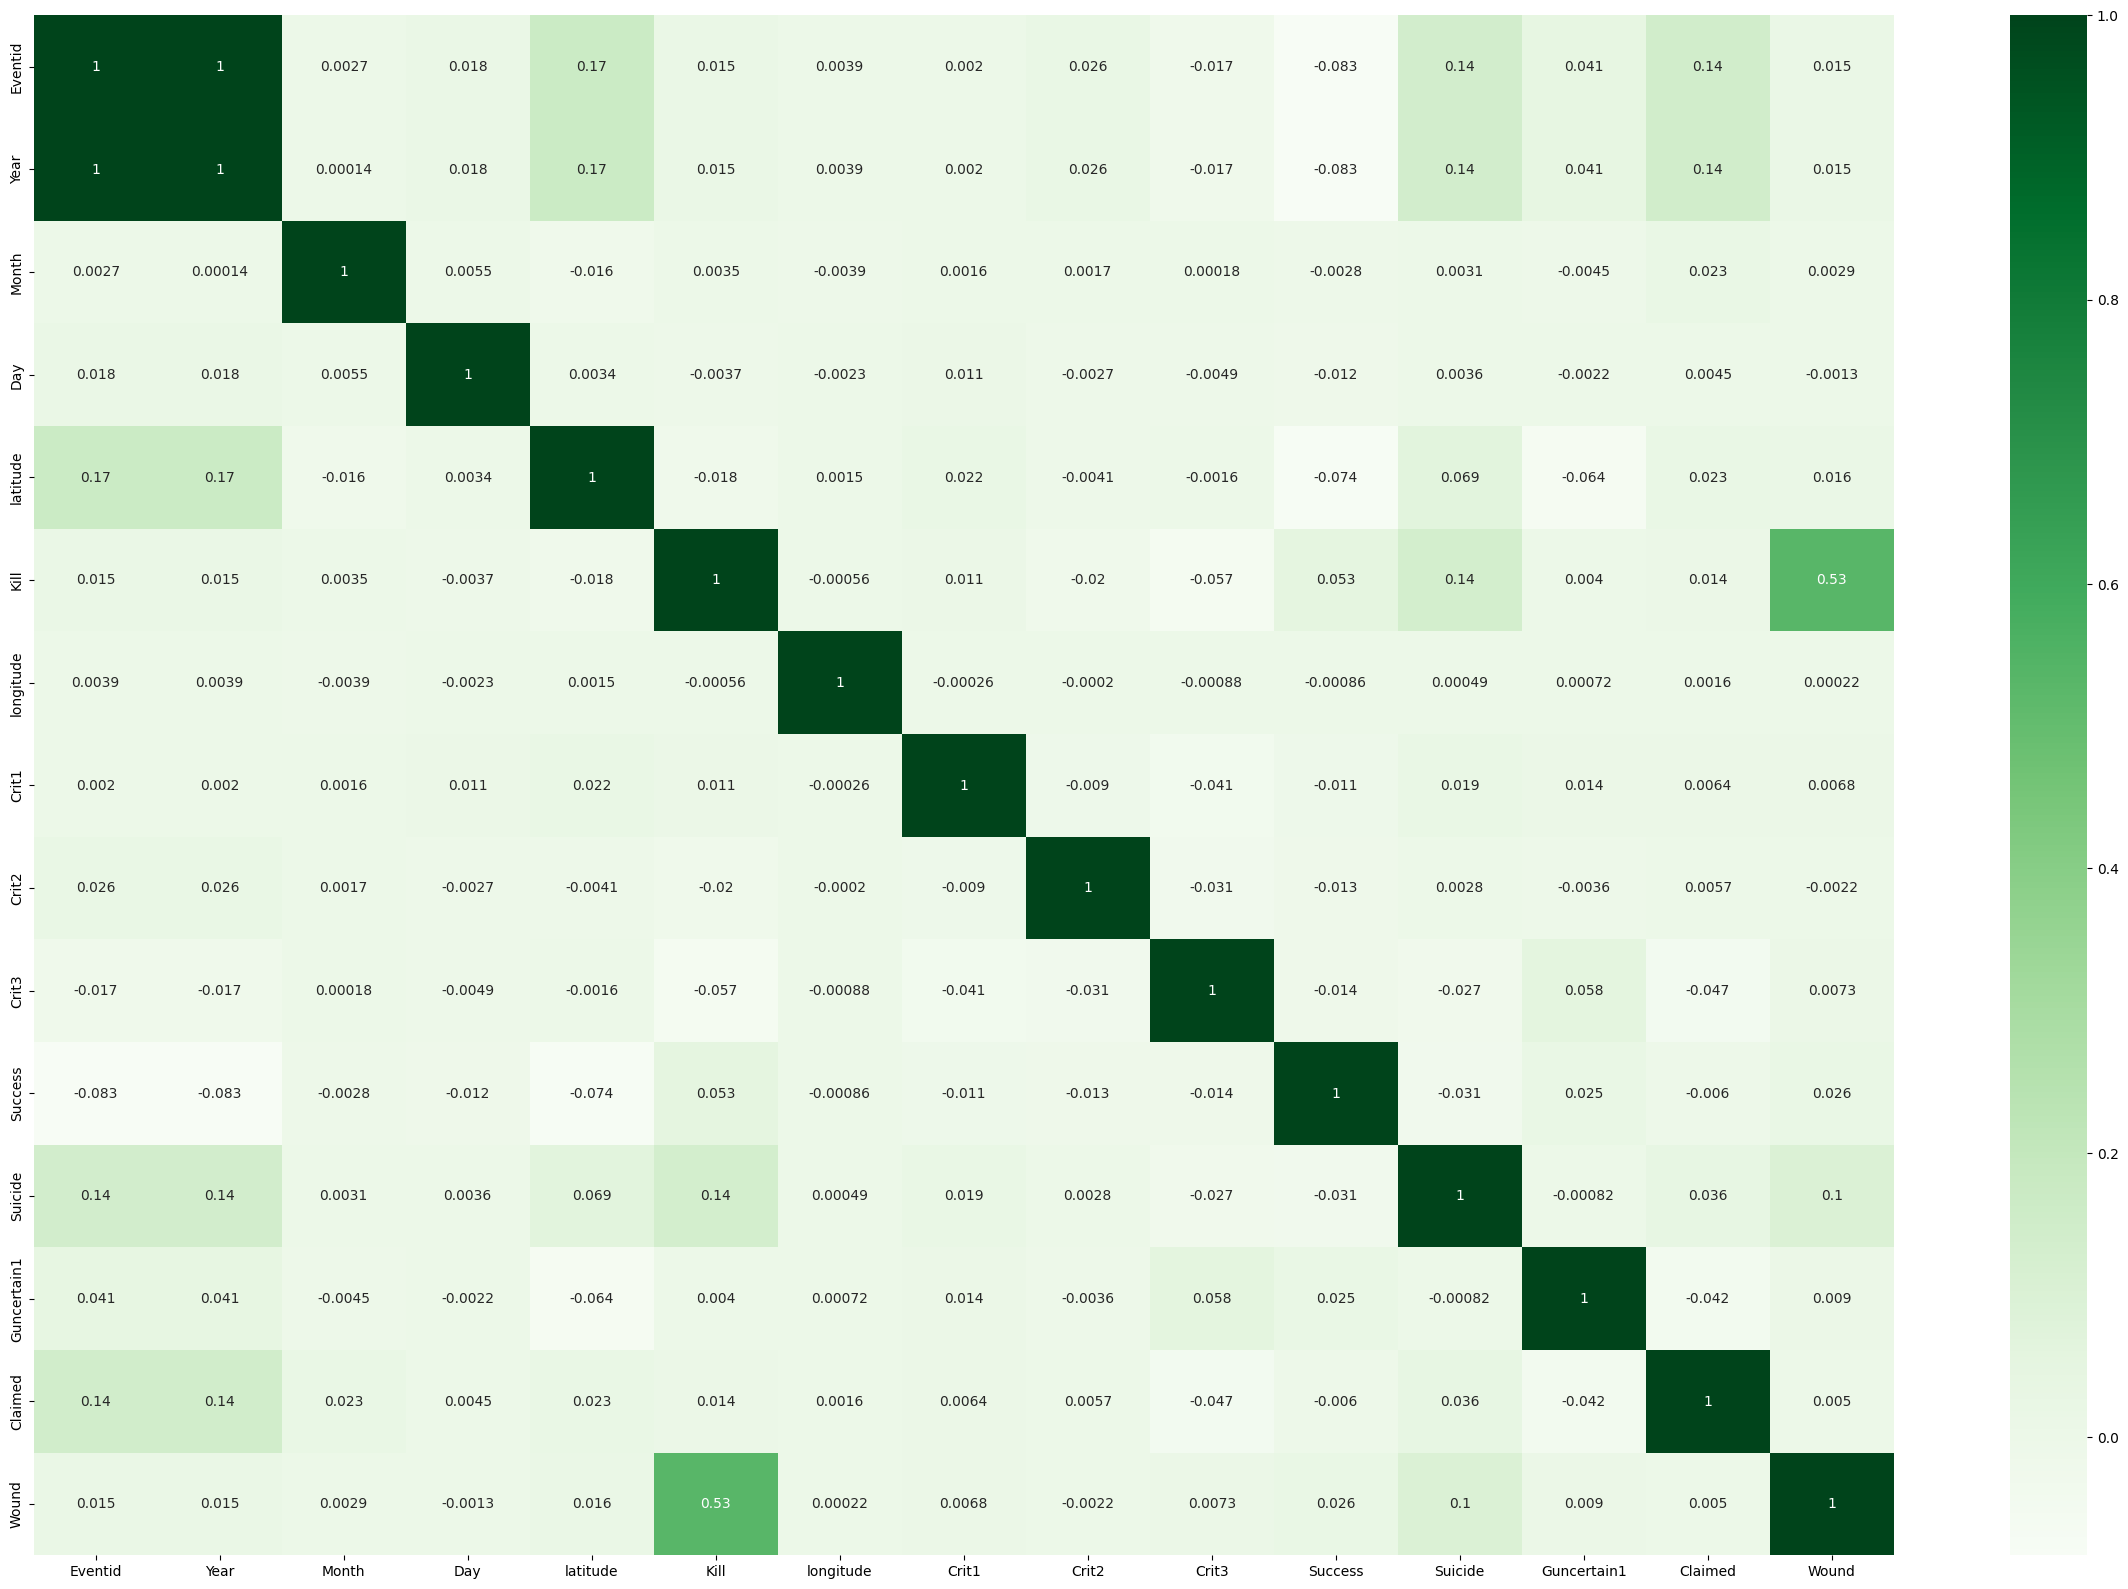

In [13]:
datacorr = data.corr()
plt.figure(figsize=(30,20))
sns.heatmap(datacorr.iloc[:15,:15], annot=True, cmap="Greens")

Number of Attacks Each Year

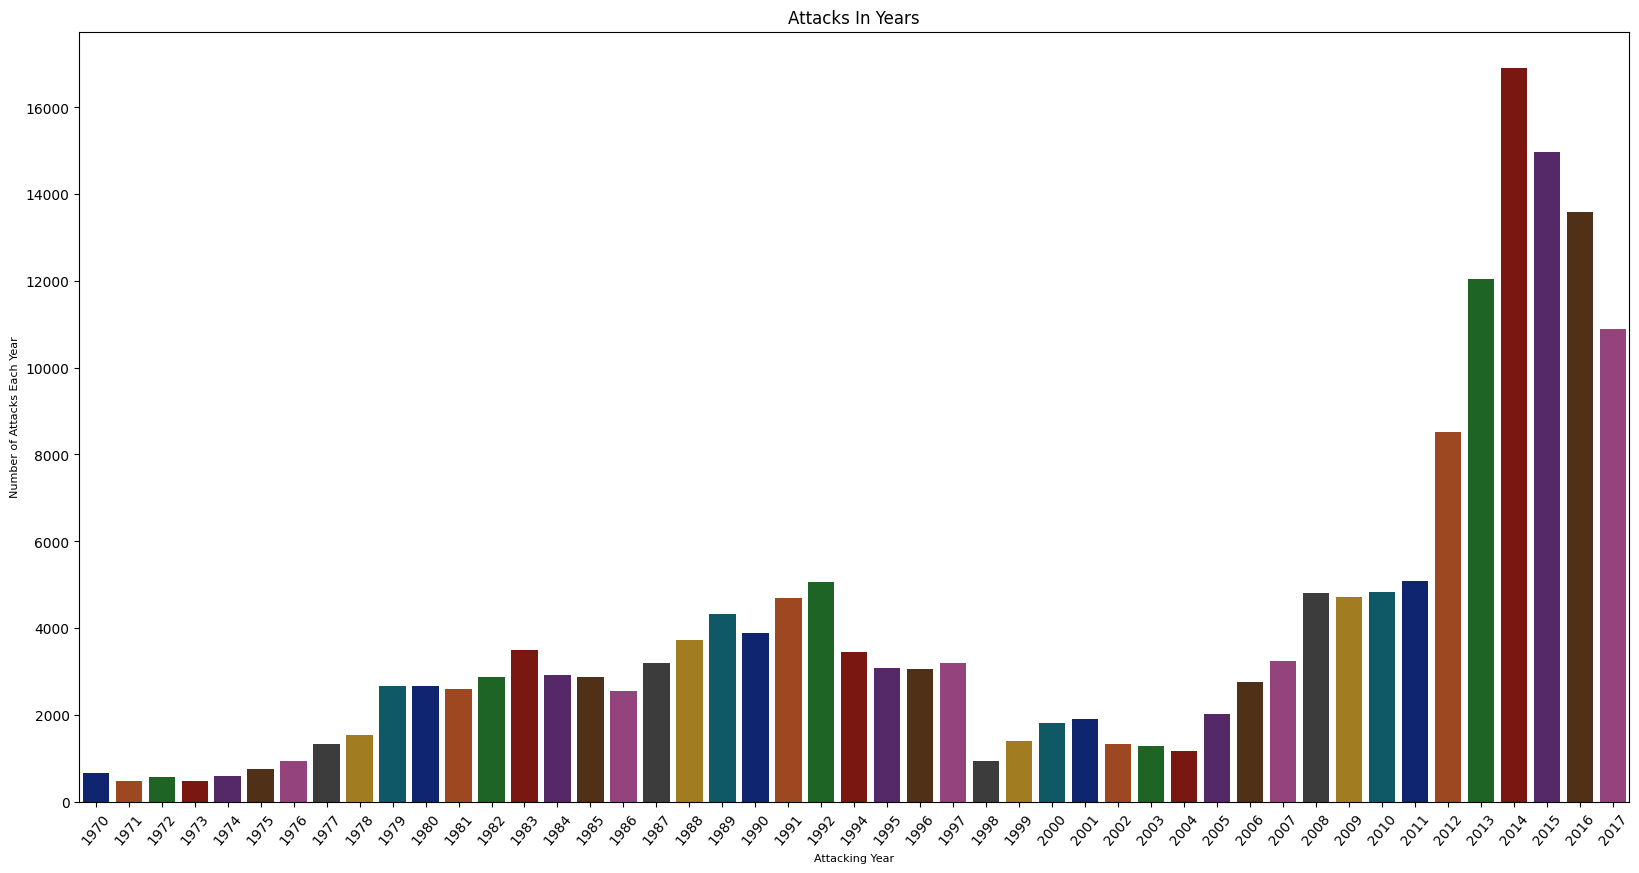

In [14]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (20,10))
sns.barplot(x = year, y = years_count, palette = "dark")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=8)
plt.ylabel('Number of Attacks Each Year',fontsize=8)
plt.title('Attacks In Years',fontsize=12)
plt.show()

In [15]:
killData = data.loc[:,'Kill']
print('Number of Deaths by Terror Attack:', int(sum(killData.dropna())))

Number of Deaths by Terror Attack: 411868


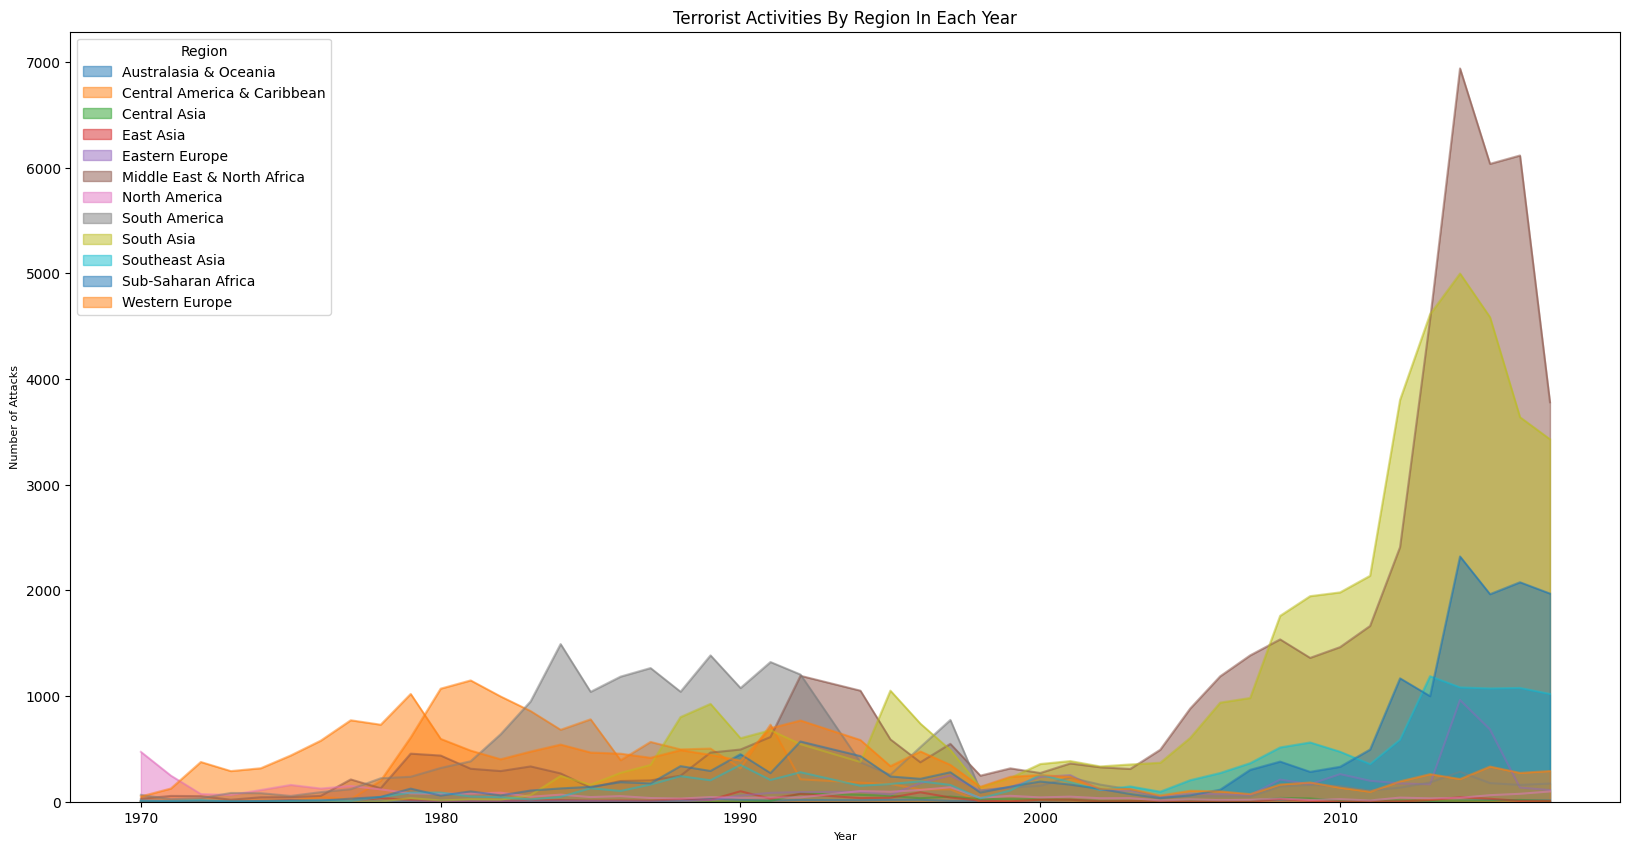

In [16]:
#Terrorist Activities by Region Each Year
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=12)
plt.ylabel('Number of Attacks',fontsize=8)
plt.xlabel("Year",fontsize=8)
plt.show()

In [17]:
attack = data.Country.value_counts()[:5]
attack

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

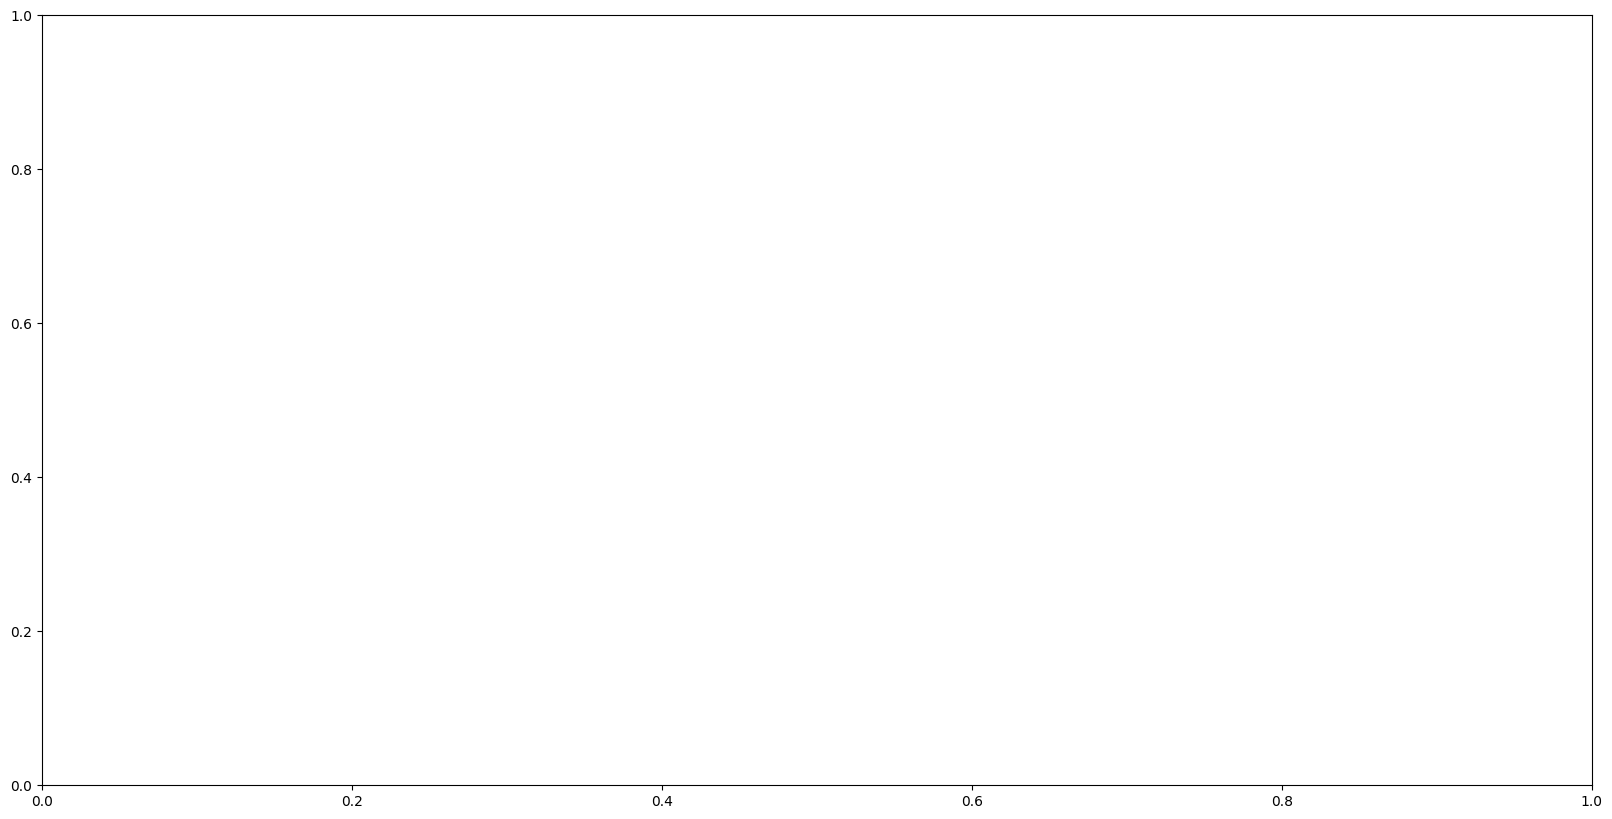

In [18]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:15].index,data['Country'].value_counts()[:15].values,palette='dark')
plt.title('Top Countries by Attack')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

Country with the most attacks: Iraq

In [ ]:
data.Gname.value_counts()[:5]

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: Gname, dtype: int64

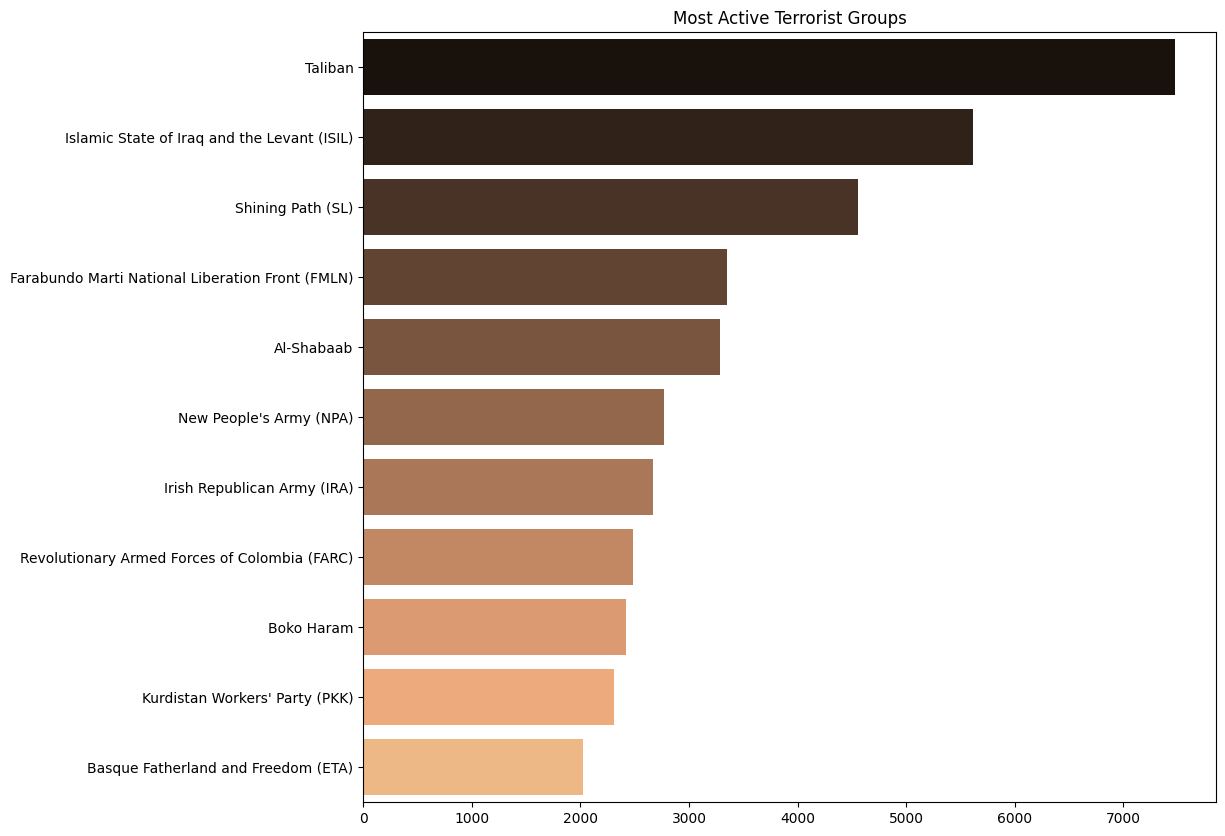

In [ ]:
plt.subplots(figsize=(11,10))
sns.barplot(y=data['Gname'].value_counts()[1:12].index,x=data['Gname'].value_counts()[1:12].values,
           palette='copper')
plt.title('Most Active Terrorist Groups')
plt.show()

Group with the most attacks: Taliban

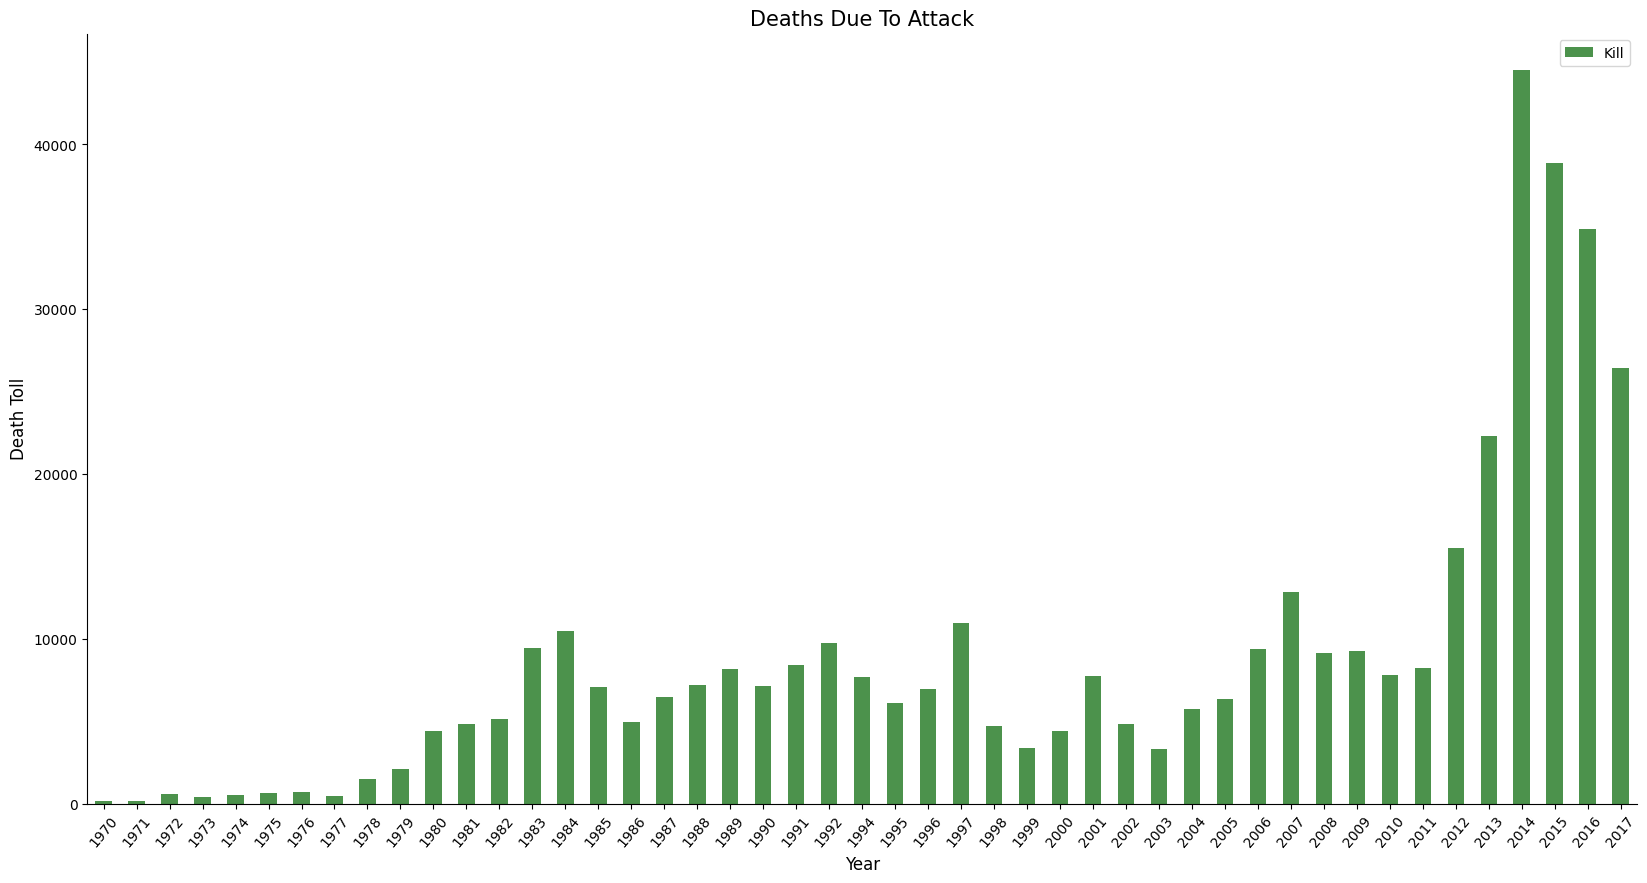

In [ ]:
df = data[['Year','Kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4,color='darkgreen')
plt.xticks(rotation = 50)
plt.title("Deaths Due To Attack",fontsize=15)
plt.ylabel("Death Toll",fontsize=12)
plt.xlabel('Year',fontsize=12)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

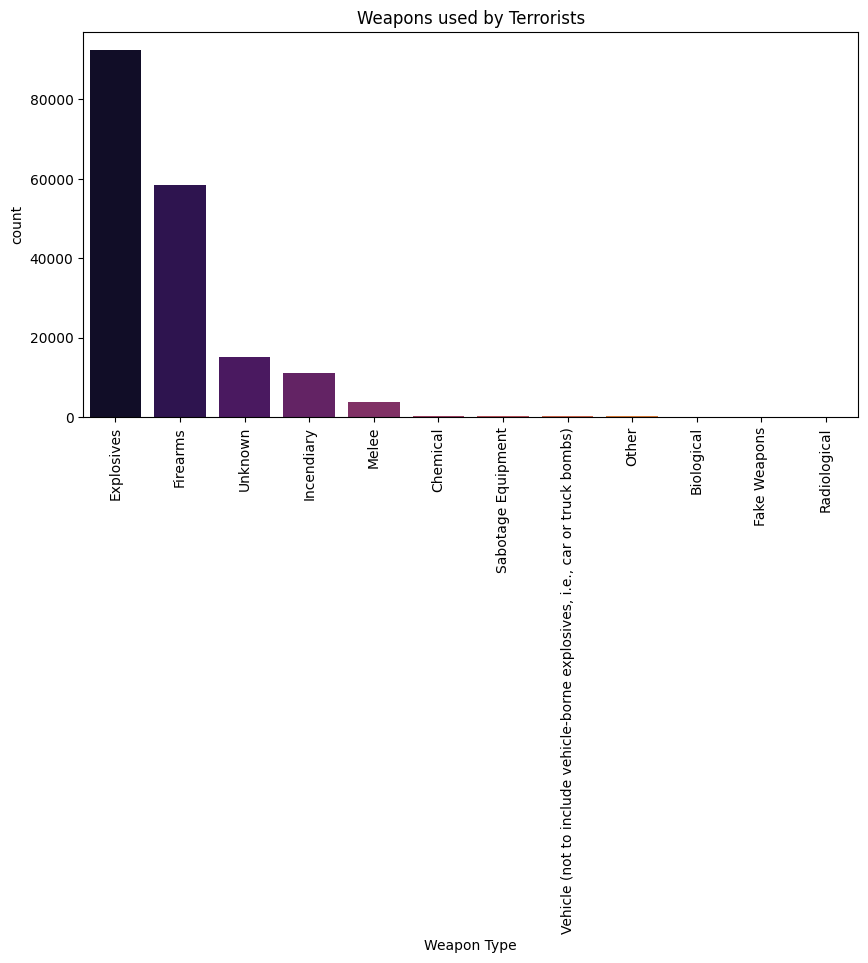

In [ ]:
#Weapons Used for Attacks
plt.subplots(figsize=(10,5))
sns.countplot('Weaptype',data=data,palette='inferno',order=data['Weaptype'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Weapon Type')
plt.title('Weapons used by Terrorists')
plt.show()

Text(0, 0.5, 'Number of attacks')

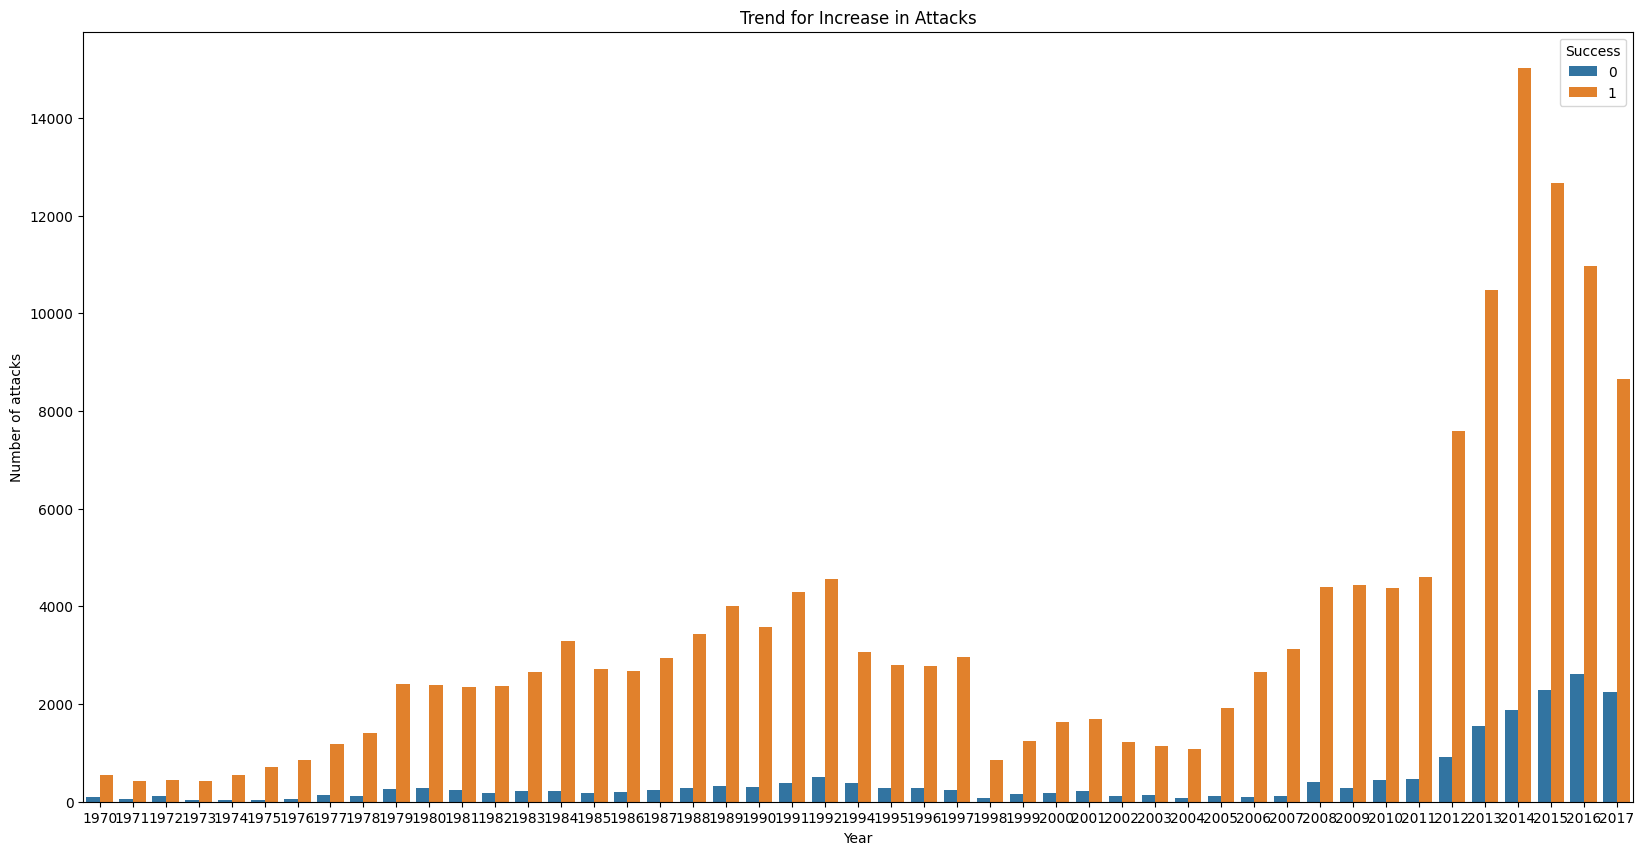

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='Year',hue='Success',data=data)
plt.title('Trend for Increase in Attacks')
plt.xlabel('Year')
plt.ylabel('Number of attacks')

Attacks by Country and Region

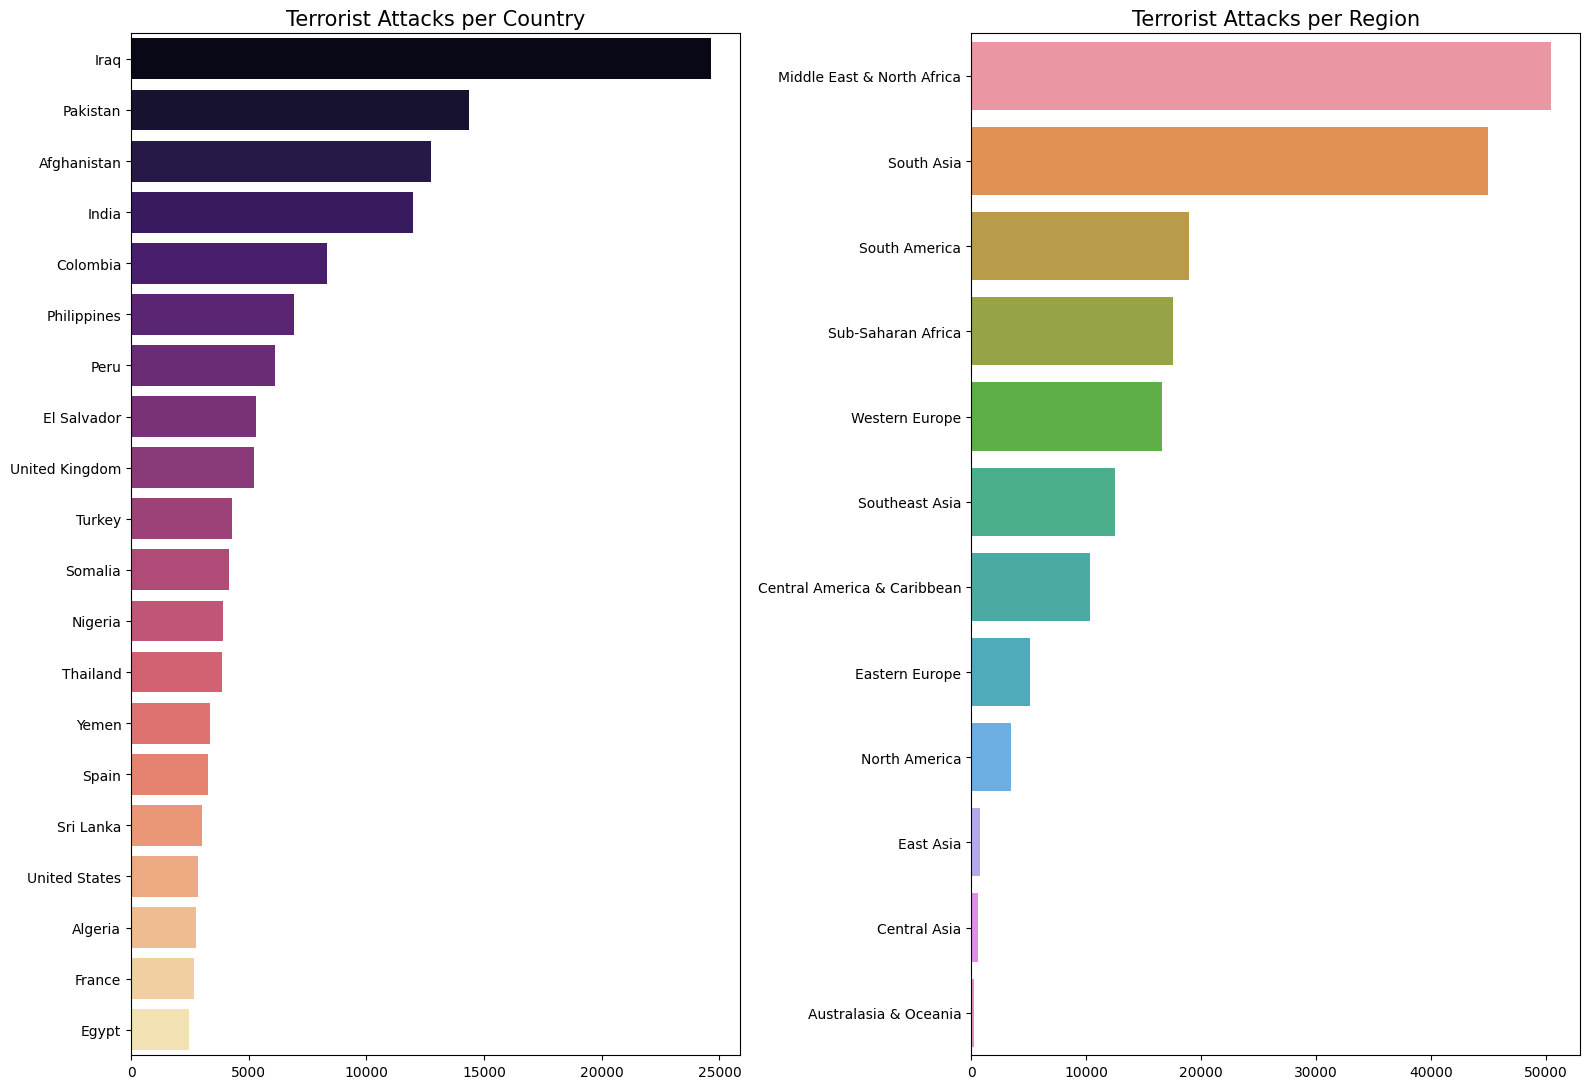

In [ ]:
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = data['Country'].value_counts()[:20].values, y = data['Country'].value_counts()[:20].index, 
            ax=axes[0],palette = 'magma');
axes[0].set_title('Terrorist Attacks per Country', fontsize=15)
sns.barplot(x=data['Region'].value_counts().values,y=data['Region'].value_counts().index,
            ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region', fontsize=15)
fig.tight_layout()
plt.show()

Most Affected Targets

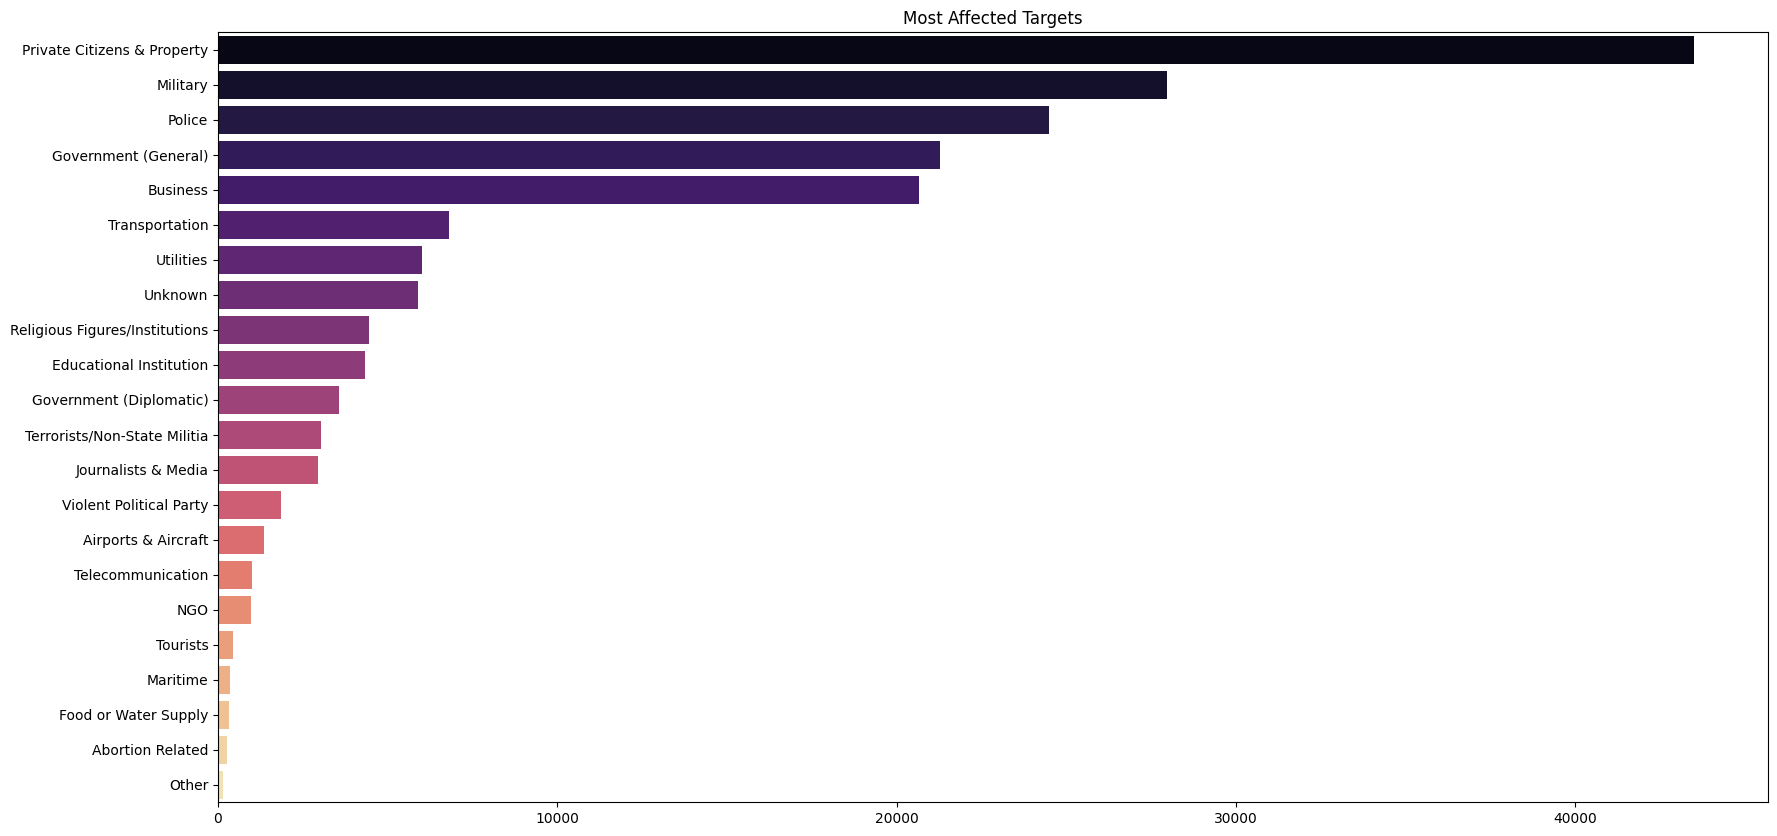

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(y=data['Targtype'].value_counts().index,x=data['Targtype'].value_counts().values,
           palette='magma')
plt.title('Most Affected Targets')
plt.show()

Number of Killed and Wounded During Attacks

Text(0.5, 1.0, 'Number of Killed and Wounded by Attack')

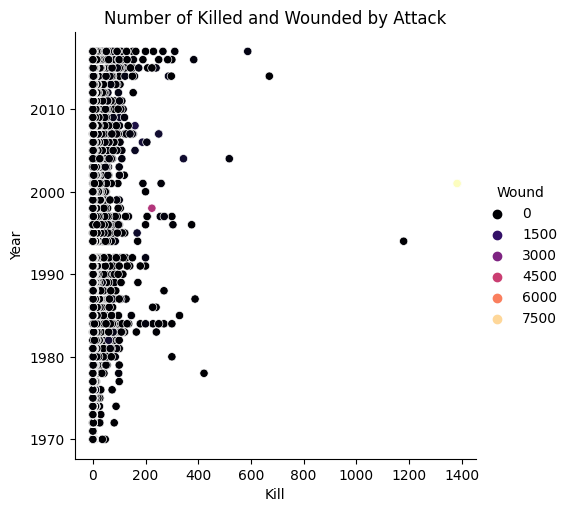

In [ ]:
sns.relplot(data=data, x="Kill", y="Year", hue="Wound", palette='magma')
plt.title('Number of Killed and Wounded by Attack')

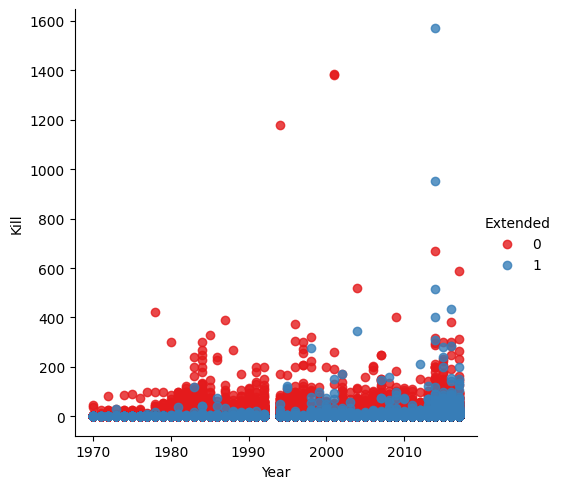

In [ ]:
#Number of deaths with respect to the extended parameter that is if the people killed were involved in an encounter for more than 24 hours
sns.lmplot(x='Year',y='Kill',data=data,fit_reg=False,hue='Extended',legend=True,palette="Set1")

Text(0.5, 1.0, 'Number of Events where Hostage were Taken')

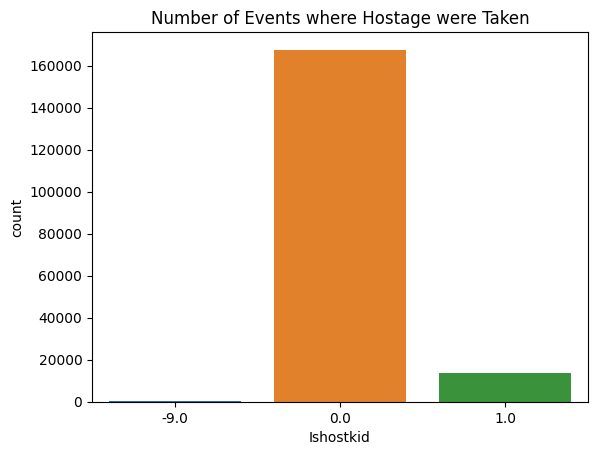

In [ ]:
sns.countplot(data['Ishostkid'])
plt.title('Number of Events where Hostage were Taken')

Text(0.5, 1.0, 'Number of Hostages - Rescued or Not')

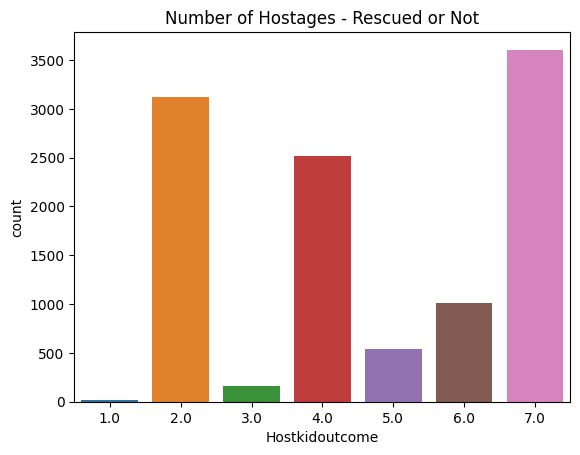

In [ ]:
sns.countplot(data['Hostkidoutcome'])
plt.title('Number of Hostages - Rescued or Not')

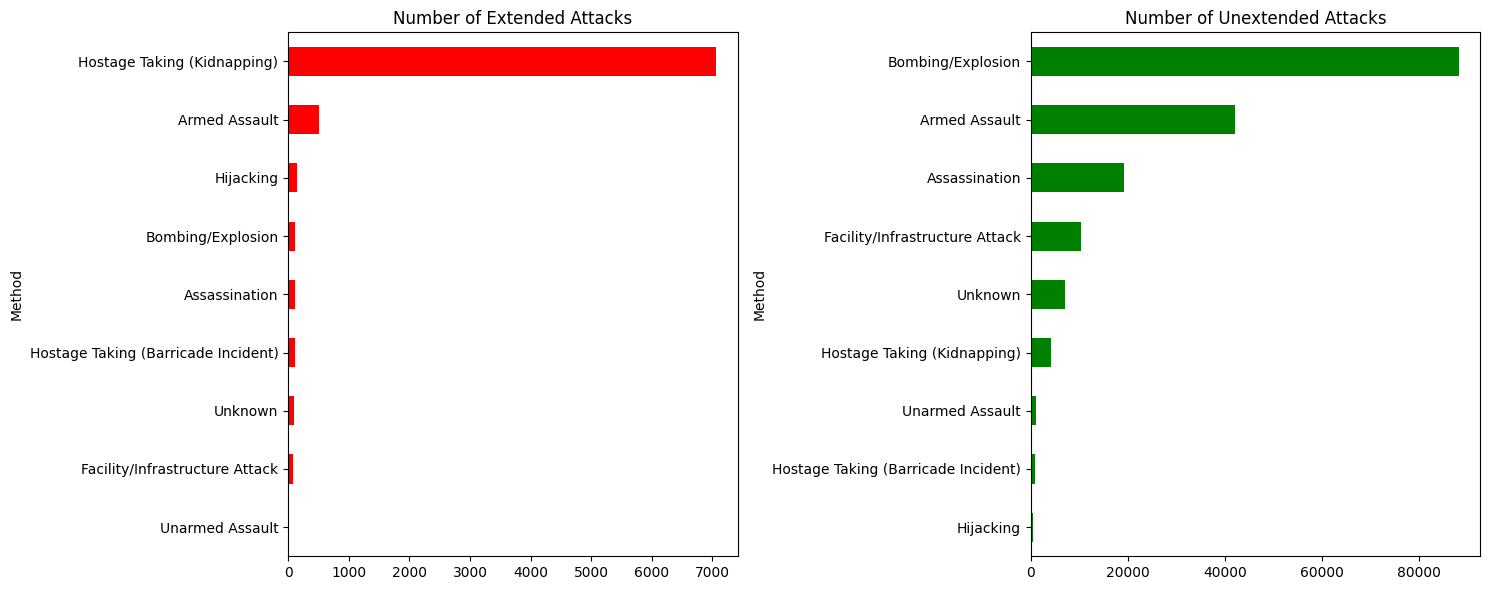

In [ ]:
#Extended Attacks vs Non-Extended Attacks
fig,ax = plt.subplots(figsize=(15,6),nrows=1,ncols=2)
ax[0]=data[data['Extended']==1].groupby('Attacktype').count()['Extended'].sort_values().plot.barh(color='red',ax=ax[0])
ax[1]=data[data['Extended']==0].groupby('Attacktype').count()['Extended'].sort_values().plot.barh(color='green',ax=ax[1])
ax[0].set_title('Number of Extended Attacks')
ax[0].set_ylabel('Method')
ax[1].set_title('Number of Unextended Attacks')
ax[1].set_ylabel('Method')
plt.tight_layout()
plt.show()

War on Terror

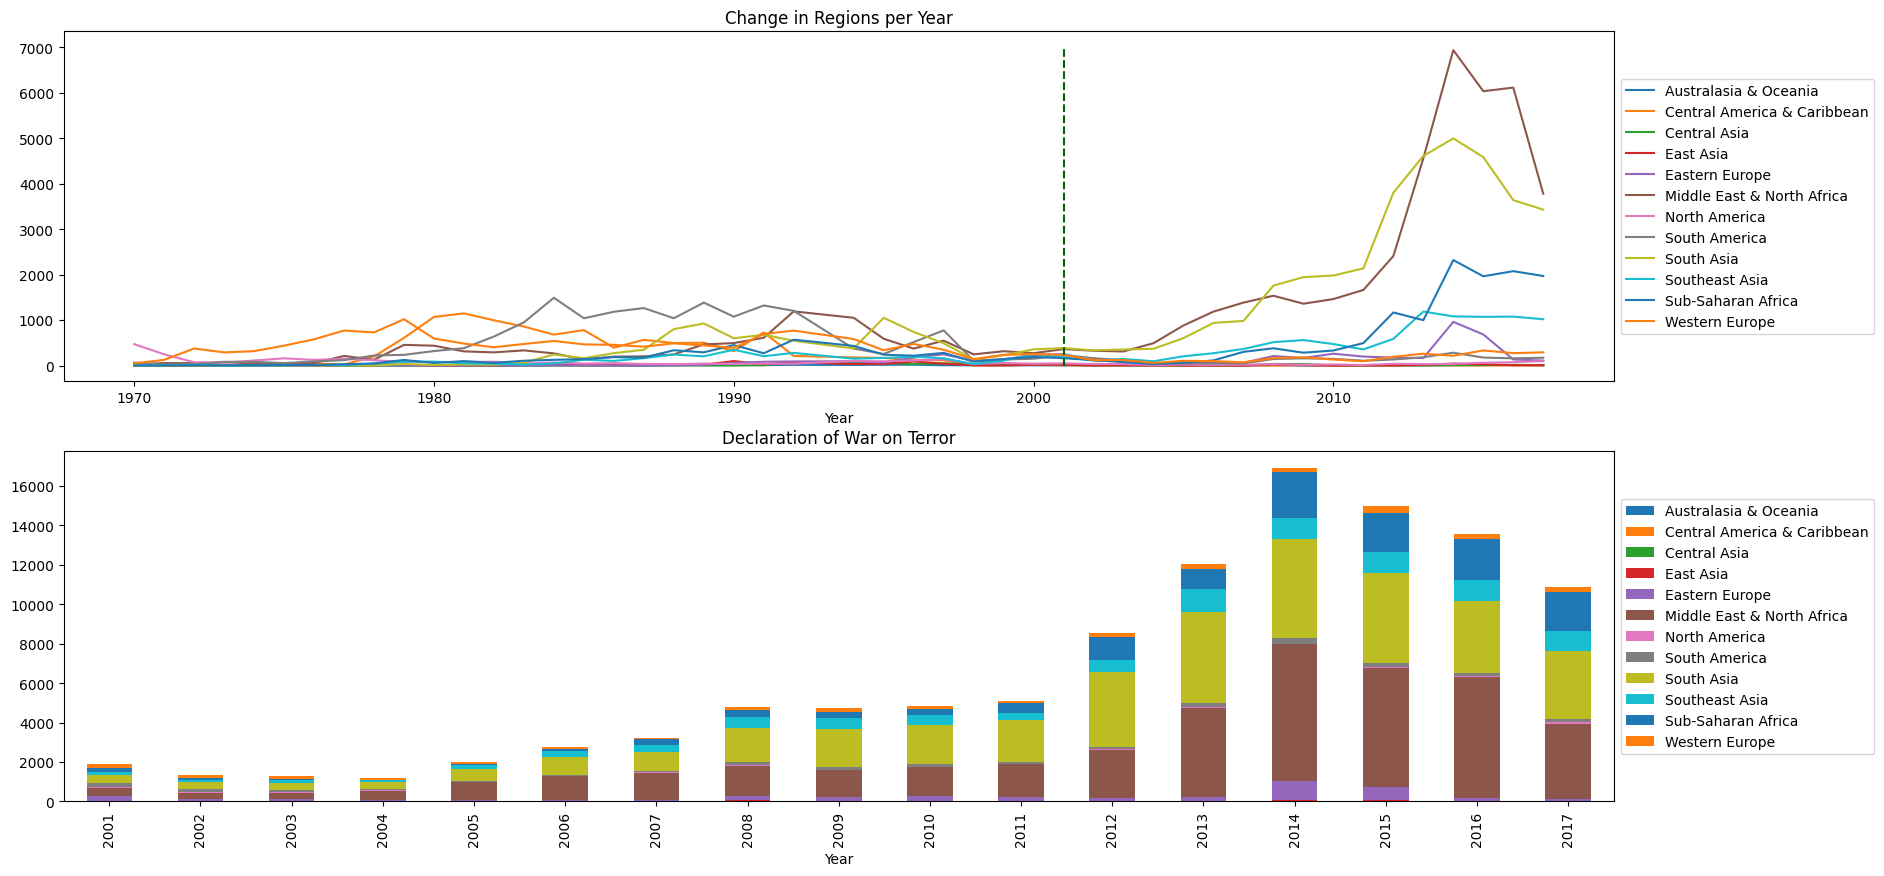

In [ ]:
df_after = data[data['Year']>=2001]
fig,ax = plt.subplots(figsize=(20,10),nrows=2,ncols=1)
ax[0] = pd.crosstab(data.Year,data.Region).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc='center left',bbox_to_anchor = (1,0.5))
ax[0].vlines(x=2001,ymin=0,ymax=7000,colors='darkgreen',linestyles='--')
pd.crosstab(df_after.Year,df_after.Region).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('Declaration of War on Terror')
ax[1].legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.show()